Sentiment Analysis for using BERT by Scrapping data from BEST BUY for Google Home Mini.

 Create a BERT/Transformer model for classifying the sentiment corpus that you have created. There will be two classes - positive and negative.

**Create a BERT model and fine-tune it for sentiment analysis**

*BERT stands for Bidirectional Encoder Representations from Transformers and it is a state-of-the-art machine learning model used for NLP tasks.*


*There are two pre-trained general BERT variations: The base model is a 12-layer, 768-hidden, 12-heads, 110M parameter neural network architecture, whereas the large model is a 24-layer, 1024-hidden, 16-heads, 340M parameter neural network architecture.*

[link text](https://miro.medium.com/max/1640/1*UgytWW_huSrfWtGUV5vmNQ.png

![](https://miro.medium.com/max/1640/1*UgytWW_huSrfWtGUV5vmNQ.png)

**Installing Hugging Face Transformers Library**

*Install Transformers library;*

*Load the BERT Classifier and Tokenizer alıng with Input modules;*

*Download the IMDB Reviews Data and create a processed dataset (this will take several operations;*

*Configure the Loaded BERT model and Train for Fine-tuning*

*Make Predictions with the Fine-tuned Model*

In [271]:
!pip install transformers

In [272]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertForSequenceClassification: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier', 'dropout_227']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Let’s see the summary of our BERT model:**


In [273]:
model.summary()

Model: "tf_bert_for_sequence_classification_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_227 (Dropout)        multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [274]:
import tensorflow as tf
import pandas as pd

In [275]:
#Importing the required libraries
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import nltk
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from nltk.corpus import stopwords
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from nltk.corpus import opinion_lexicon

In [276]:
import requests 
from bs4 import BeautifulSoup 
import csv 

In [277]:

#Scraping Google Mini reviews from Best Buy using Beautiful Soup
data = []
for i in range(1,50):

    url = ("https://www.bestbuy.com/site/reviews/google-home-mini-charcoal/6082195?rating=1%2C2%2C3%2C4&page="+ str(i))
    page = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    #soup = BeautifulSoup(page)
    soup = BeautifulSoup(page.content, 'html5lib') 
    #print(soup.prettify())
    x = soup.find_all("li", {"class":"review-item"})
    #print(x)
    for item in x:
        author_name =item.find_all("div",attrs = {"class":"ugc-author v-fw-medium body-copy-lg"})[0].text
        #print(author_name)
        rating = (item.find_all("p",attrs={"class":"sr-only"})[0].text).split()[1]
        #print(rating)
        #print(item.find_all("h4",attrs={"class":"review-title c-section-title heading-5 v-fw-medium"}))
        #review_title = item.find_all("h4",attrs={"class":"review-title c-section-title heading-5 v-fw-medium"})[0].text
        review_title="Amazon Review"
        #print(review_title)
        review_description = item.find_all("p",attrs={"class":"pre-white-space"})[0].text
        #print(review_description)
        data.append((author_name,rating, review_title,review_description ))

In [278]:
#Reading the reviews into a dataframe using Pandas
reviews_df= pd.DataFrame(data)
reviews_df.columns = ["Review_Author","Review_Rating","Review_Title","Review_Description"]

In [279]:
# lets look how the data looks like
reviews_df.head()

,Review_Author,Review_Rating,Review_Title,Review_Description
0,Loquita,4,Shreyas,"I’m still exploring features, but is better th..."
1,Yhippa,4,Shreyas,The Mini does pretty much everything that the ...
2,KReed,4,Shreyas,My only gripe is that even though the instruct...
3,krisiskris,4,Shreyas,I’ve had an Alexa Echo for about a year now an...
4,MzTrina,4,Shreyas,This google mini is very handy when your cooki...


In [280]:
reviews_df.shape

(980, 4)

In [282]:
# Postive words from lexicon
pos_list=set(opinion_lexicon.positive())

In [283]:
len(pos_list)

2006

In [284]:
# Negetive words from lexicon
neg_list=set(opinion_lexicon.negative())

In [285]:
len(neg_list)

4783

**Tokenize the words**

In [286]:
tweets = []

positive_count_summary_list = []
positive_summary_count= []

positive_words_list = []

negative_count_summary_list = []
negative_summary_count =[]

negative_words_list = []

appended_data = pd.DataFrame([])
sentiment_summary_list = []

stopwords_set = set(stopwords.words("english"))

for index, row in reviews_df.iterrows():
    
        words_filtered = [e.lower() for e in row.Review_Description.split() if len(e) >= 3]
        words_without_stopwords = [word for word in words_filtered if not word in stopwords_set]
        
        positive_words = set(pos_list).intersection(words_without_stopwords)
        positive_words_list.append(positive_words)
        
        positive_count = len(set(pos_list).intersection(words_without_stopwords))
        negative_count = len(set(neg_list).intersection(words_without_stopwords))
        
        negative_words = set(neg_list).intersection(words_without_stopwords)
        negative_words_list.append(negative_words)

        positive_count_summary_list.append(positive_count)
        negative_count_summary_list.append(negative_count)
    
        if positive_count > negative_count:
            sentiment_summary_list.append('positive')
            #tweets.append((words_without_stopwords,sentiment_summary_list))

            
        elif positive_count < negative_count:
            sentiment_summary_list.append('negative')

        else:
            sentiment_summary_list.append('neutral')
            
        tweets.append((words_without_stopwords, sentiment_summary_list[-1]))
reviews_df['summary_sentiment'] = pd.DataFrame((sentiment_summary_list))

In [287]:
reviews_df.head()

,Review_Author,Review_Rating,Review_Title,Review_Description,summary_sentiment
0,Loquita,4,Shreyas,"I’m still exploring features, but is better th...",positive
1,Yhippa,4,Shreyas,The Mini does pretty much everything that the ...,negative
2,KReed,4,Shreyas,My only gripe is that even though the instruct...,neutral
3,krisiskris,4,Shreyas,I’ve had an Alexa Echo for about a year now an...,neutral
4,MzTrina,4,Shreyas,This google mini is very handy when your cooki...,positive


In [288]:
reviews_df.shape

(980, 5)

In [289]:
# Postive words from lexicon
pos_list=set(opinion_lexicon.positive())

In [290]:
len(pos_list)

2006

In [291]:
# Negetive words from lexicon
neg_list=set(opinion_lexicon.negative())

In [292]:
len(neg_list)

4783

**Tokenize the words**

In [293]:
tweets = []

positive_count_summary_list = []
positive_summary_count= []

positive_words_list = []

negative_count_summary_list = []
negative_summary_count =[]

negative_words_list = []

appended_data = pd.DataFrame([])
sentiment_summary_list = []

stopwords_set = set(stopwords.words("english"))

for index, row in reviews_df.iterrows():
    
        words_filtered = [e.lower() for e in row.Review_Description.split() if len(e) >= 3]
        words_without_stopwords = [word for word in words_filtered if not word in stopwords_set]
        
        positive_words = set(pos_list).intersection(words_without_stopwords)
        positive_words_list.append(positive_words)
        
        positive_count = len(set(pos_list).intersection(words_without_stopwords))
        negative_count = len(set(neg_list).intersection(words_without_stopwords))
        
        negative_words = set(neg_list).intersection(words_without_stopwords)
        negative_words_list.append(negative_words)

        positive_count_summary_list.append(positive_count)
        negative_count_summary_list.append(negative_count)
    
        if positive_count > negative_count:
            sentiment_summary_list.append('positive')
            #tweets.append((words_without_stopwords,sentiment_summary_list))

            
        elif positive_count < negative_count:
            sentiment_summary_list.append('negative')

        else:
            sentiment_summary_list.append('positive')
            
        tweets.append((words_without_stopwords, sentiment_summary_list[-1]))
reviews_df['summary_sentiment'] = pd.DataFrame((sentiment_summary_list))
        

In [294]:
reviews_df.head()

,Review_Author,Review_Rating,Review_Title,Review_Description,summary_sentiment
0,Loquita,4,Shreyas,"I’m still exploring features, but is better th...",positive
1,Yhippa,4,Shreyas,The Mini does pretty much everything that the ...,negative
2,KReed,4,Shreyas,My only gripe is that even though the instruct...,positive
3,krisiskris,4,Shreyas,I’ve had an Alexa Echo for about a year now an...,positive
4,MzTrina,4,Shreyas,This google mini is very handy when your cooki...,positive


In [295]:
reviews_df = reviews_df.assign(positive_words_count=pd.Series(positive_count_summary_list).values)
reviews_df = reviews_df.assign(negative_words_count=pd.Series(negative_count_summary_list).values)
reviews_df = reviews_df.assign(positive_words=pd.Series(positive_words_list).values)
reviews_df = reviews_df.assign(negative_words=pd.Series(negative_words_list).values)

In [296]:
reviews_df.head()

,Review_Author,Review_Rating,Review_Title,Review_Description,summary_sentiment,positive_words_count,negative_words_count,positive_words,negative_words
0,Loquita,4,Shreyas,"I’m still exploring features, but is better th...",positive,1,0,{better},{}
1,Yhippa,4,Shreyas,The Mini does pretty much everything that the ...,negative,3,5,"{nice, pretty, better}","{suspect, frustration, knock, bother, problem}"
2,KReed,4,Shreyas,My only gripe is that even though the instruct...,positive,1,1,{works},{gripe}
3,krisiskris,4,Shreyas,I’ve had an Alexa Echo for about a year now an...,positive,1,1,{precise},{downside}
4,MzTrina,4,Shreyas,This google mini is very handy when your cooki...,positive,1,0,{handy},{}


**Visualized the set of positive words in reviews**

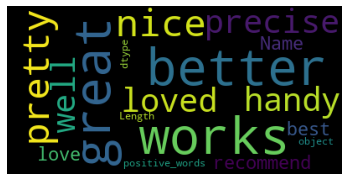

In [297]:
wordcloud = WordCloud(background_color='black',
                          #stopwords=stopwords,
                          max_words=800,
                          max_font_size=60, 
                          random_state=50).generate(str(reviews_df['positive_words']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Visualized the set of negative words in reviews**

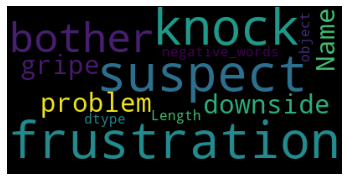

In [298]:
wordcloud = WordCloud(background_color='black',
                          #stopwords=stopwords,
                          max_words=800,
                          max_font_size=60, 
                          random_state=50).generate(str(reviews_df['negative_words']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [299]:
df= pd.DataFrame(reviews_df[['Review_Description','summary_sentiment']])

In [300]:
df.head()

,Review_Description,summary_sentiment
0,"I’m still exploring features, but is better th...",positive
1,The Mini does pretty much everything that the ...,negative
2,My only gripe is that even though the instruct...,positive
3,I’ve had an Alexa Echo for about a year now an...,positive
4,This google mini is very handy when your cooki...,positive


In [302]:
df['summary_sentiment'] = df['summary_sentiment'].map({'negative': 0,'positive': 1})

In [303]:
df.head()

,Review_Description,summary_sentiment
0,"I’m still exploring features, but is better th...",1
1,The Mini does pretty much everything that the ...,0
2,My only gripe is that even though the instruct...,1
3,I’ve had an Alexa Echo for about a year now an...,1
4,This google mini is very handy when your cooki...,1


In [304]:
df.shape

(980, 2)

**Splitting The Data to Train Test Split**

In [305]:
train=df[:800]
test=df[801:]

In [306]:
train.head()

,Review_Description,summary_sentiment
0,"I’m still exploring features, but is better th...",1
1,The Mini does pretty much everything that the ...,0
2,My only gripe is that even though the instruct...,1
3,I’ve had an Alexa Echo for about a year now an...,1
4,This google mini is very handy when your cooki...,1


In [307]:
test.head()

,Review_Description,summary_sentiment
801,Purchase google home last year and used it a l...,1
802,WOW! I didn’t expect the great sound that come...,1
803,I love the Google home Mini the only reason I ...,1
804,Love the control of audiocast devices and chro...,1
805,"Does exactly what its ment to, sometimes has ...",1


Creating Input Sequences

Converting the Pandas Dataframe into suitable object in BERt Model **bold text**

In [234]:
#This will accept our train and test datasets and convert each row into an InputExample object

def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')

In [235]:
# This function will tokenize the InputExample objects, then create the required input format 
# with the tokenized objects, finally, create an input dataset that we can feed to the model.

def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'Review_Description'
LABEL_COLUMN = 'summary_sentiment'

In [308]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

In [309]:
train_InputExamples

0      InputExample(guid=None, text_a='I’m still expl...
1      InputExample(guid=None, text_a="The Mini does ...
2      InputExample(guid=None, text_a="My only gripe ...
3      InputExample(guid=None, text_a='I’ve had an Al...
4      InputExample(guid=None, text_a="This google mi...
                             ...                        
795    InputExample(guid=None, text_a='The google hom...
796    InputExample(guid=None, text_a='I bought these...
797    InputExample(guid=None, text_a="This was a gre...
798    InputExample(guid=None, text_a='Got to admit t...
799    InputExample(guid=None, text_a='Very happy wit...
Length: 800, dtype: object

In [310]:
validation_InputExamples

801    InputExample(guid=None, text_a='Purchase googl...
802    InputExample(guid=None, text_a='WOW! I didn’t ...
803    InputExample(guid=None, text_a="I love the Goo...
804    InputExample(guid=None, text_a="Love the contr...
805    InputExample(guid=None, text_a='Does exactly w...
                             ...                        
975    InputExample(guid=None, text_a='I think the Go...
976    InputExample(guid=None, text_a='This was a gif...
977    InputExample(guid=None, text_a="As long as you...
978    InputExample(guid=None, text_a='This is a geat...
979    InputExample(guid=None, text_a='I love it, but...
Length: 179, dtype: object

In [311]:
tokenizer

PreTrainedTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [312]:
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [313]:
train_data

<FlatMapDataset shapes: ({input_ids: (None,), attention_mask: (None,), token_type_ids: (None,)}, ()), types: ({input_ids: tf.int32, attention_mask: tf.int32, token_type_ids: tf.int32}, tf.int64)>

In [314]:
train_data = train_data.shuffle(100).batch(32).repeat(2)

In [315]:
validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [316]:
validation_data 

<FlatMapDataset shapes: ({input_ids: (None,), attention_mask: (None,), token_type_ids: (None,)}, ()), types: ({input_ids: tf.int32, attention_mask: tf.int32, token_type_ids: tf.int32}, tf.int64)>

In [317]:
validation_data = validation_data.batch(32)

In [318]:
validation_data

<BatchDataset shapes: ({input_ids: (None, None), attention_mask: (None, None), token_type_ids: (None, None)}, (None,)), types: ({input_ids: tf.int32, attention_mask: tf.int32, token_type_ids: tf.int32}, tf.int64)>

**Configuring the BERT model and Fine-tuning**

In [319]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=2, validation_data=validation_data)

Epoch 1/2
50/50 [==============================] - 81s 2s/step - loss: 0.2101 - accuracy: 0.9531 - val_loss: 0.1635 - val_accuracy: 0.9609
Epoch 2/2
50/50 [==============================] - 77s 2s/step - loss: 0.1444 - accuracy: 0.9569 - val_loss: 0.1438 - val_accuracy: 0.9441


In [267]:
pred_sentences = ['Love the Product. WOW! what a sound!',
                  'One of the worst product  of all time. I hate such creepy sound . It doesnot work well']

In [268]:
# We need to tokenize our reviews with our pre-trained BERT tokenizer
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_batch
tf_outputs = model(tf_batch)
tf_outputs
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
tf_predictions
labels = ['Negative','Positive']

In [269]:
tf_predictions

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.00701986, 0.9929802 ],
       [0.0059481 , 0.9940519 ]], dtype=float32)>

In [270]:
label = tf.argmax(tf_predictions, axis=1)
print(label)
label = label.numpy()
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])

tf.Tensor([1 1], shape=(2,), dtype=int64)
Love the Product. WOW! what a sound! : 
 Positive
One of the worst product  of all time. I hate such creepy sound . It doesnot work well : 
 Positive


Here, we can see model is more Accurate as compared to that of of LSTM as Learning is Fast, It takes the enitre context fo sentence into consideration.